<a href="https://colab.research.google.com/github/nimeshayasith/Computer_vision_Assignment/blob/main/4624_Question_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Update this path if you named your folder something else
project_path = '/content/drive/MyDrive/CV_Assessment_01'

# Change the current working directory
os.chdir(project_path)

# Verify you are in the right place
print("Current Working Directory:", os.getcwd())
print("Files in Dataset folder:", os.listdir('Dataset'))

Current Working Directory: /content/drive/MyDrive/CV_Assessment_01
Files in Dataset folder: ['IPCV_ ASSIGNMENT_01_DATABASE.zip']


In [ ]:
from google.colab import drive
import os

# 1. Define the path to your project folder
project_path = '/content/drive/MyDrive/CV_Assessment_01'
os.chdir(project_path)

# 2. Update the path to point INSIDE the Dataset folder where your zip file actually is
zip_file_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE.zip'
extract_folder = 'Dataset'

# 3. Unzip the file
!unzip -q "{zip_file_path}" -d "{extract_folder}"

print("Unzipping complete! Here are the contents of your Dataset folder:")
print(os.listdir(extract_folder))


Unzipping complete! Here are the contents of your Dataset folder:
['IPCV_ ASSIGNMENT_01_DATABASE.zip', 'IPCV_ ASSIGNMENT_01_DATABASE']


Applying 3x3 average filter (this might take a moment)...
Applying 5x5 average filter (this might take a moment)...
Applying 11x11 average filter (this might take a moment)...
Applying 15x15 average filter (this might take a moment)...


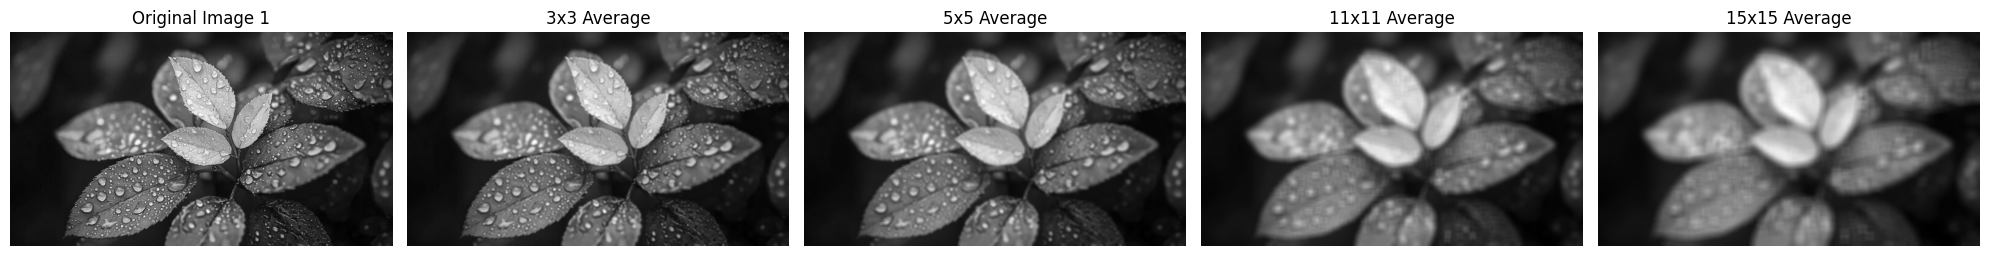

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_average_filter(image, kernel_size):
    """
    Applies a custom average filter to a grayscale image using nested loops.
    """
    # 1. Create the kernel
    # An average filter is a matrix of 1s, divided by the total number of elements
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

    # 2. Get dimensions and calculate padding
    i_h, i_w = image.shape
    pad = kernel_size // 2

    # Pad with edge reflection to handle the borders of the image
    padded_img = np.pad(image, pad, mode='reflect')

    # 3. Create an empty output array
    output_img = np.zeros_like(image, dtype=np.float32)

    # 4. The Convolution Operation (Sliding Window)
    for y in range(i_h):
        for x in range(i_w):
            # Extract the local neighborhood (Region of Interest)
            roi = padded_img[y:y+kernel_size, x:x+kernel_size]

            # Perform element-wise multiplication with the kernel and sum the result
            output_img[y, x] = np.sum(roi * kernel)

    # 5. Convert back to 8-bit unsigned integer (0-255) for image display
    return np.clip(output_img, 0, 255).astype(np.uint8)

# --- EXECUTION ---

# Define the path to Image 1 based on your extracted folder structure
img_1_path = '/content/drive/MyDrive/CV_Assessment_01/Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Images_ For_Preliminary_Part/Image_1.jpg'

# Load the image in grayscale
img_1 = cv2.imread(img_1_path, cv2.IMREAD_GRAYSCALE)

if img_1 is None:
    print(f"Error: Could not load image at {img_1_path}. Please check the file name/extension.")
else:
    # Define the required kernel sizes [cite: 28]
    sizes = [3, 5, 11, 15]
    filtered_images = []

    # Process each size
    for size in sizes:
        print(f"Applying {size}x{size} average filter (this might take a moment)...")
        result = apply_custom_average_filter(img_1, size)
        filtered_images.append(result)

    # --- PLOTTING FOR YOUR REPORT ---
    # This generates the visual output you need to include in your LaTeX report [cite: 21, 23]
    plt.figure(figsize=(20, 5))

    # Show Original
    plt.subplot(1, 5, 1)
    plt.imshow(img_1, cmap='gray')
    plt.title("Original Image 1")
    plt.axis('off')

    # Show Filtered outputs
    for i, size in enumerate(sizes):
        plt.subplot(1, 5, i+2)
        plt.imshow(filtered_images[i], cmap='gray')
        plt.title(f"{size}x{size} Average")
        plt.axis('off')

    plt.tight_layout()
    plt.show()